# Part 3: Generating important plot types
Excercise: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [97]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file
crimedata = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
# Convert the Date variable into a datetime format
crimedata['Date'] = pd.to_datetime(crimedata['Date'])
# Create a new variable that stores information about the minute
crimedata['Minutes'] = pd.to_datetime(crimedata['Time']).dt.minute

C:\Users\alpt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


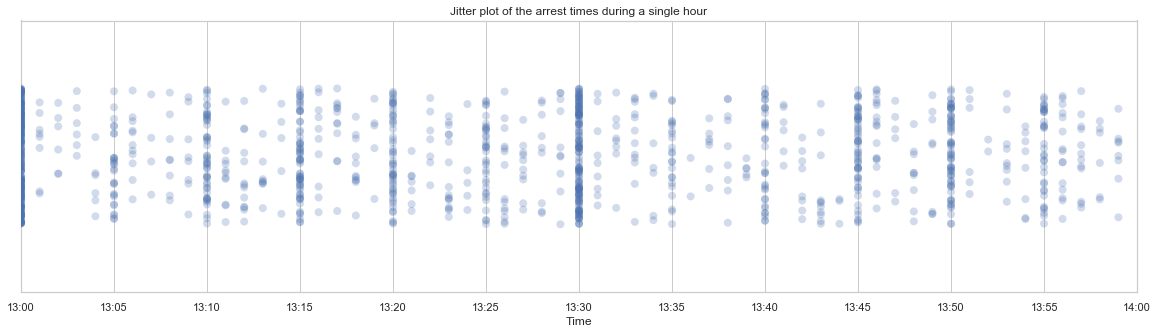

In [96]:
# Filter the data by category, time, and date
df1=crimedata[(crimedata["Category"] == 'ASSAULT') 
             & (crimedata['Time'] < '14:00') 
             & (crimedata['Time'] > '12:59')
             & (crimedata["Date"] > '2016-01-01')
             & (crimedata["Date"] < '2018-01-01')]

# Plot the assault crimes registered in 2016 and 2017, from 13:00 to 13:59
sns.set(style="whitegrid")
df1['Time'] = pd.to_datetime(df1['Time']).dt.time
fig, ax = plt.subplots(figsize=(20, 5))
sns.stripplot(df1.Time, edgecolor="gray", alpha=.25,size=8, jitter=0.25, ax=ax).set_title('Jitter plot of the arrest times during a single hour')
ax.set_xlim('13:00:00','14:00:00')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.show()

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)

    * This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
    * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

Text(0, 0.5, 'Count')

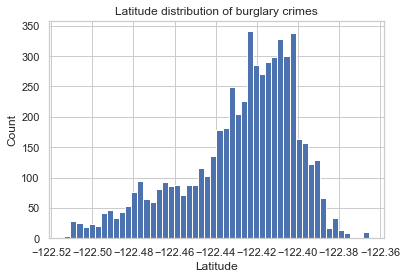

In [98]:
crime='BURGLARY'

# Filter the data by category and date
df2=crimedata[(crimedata["Category"] == crime)]
df2=df2[(df2["Date"] > '2016-01-01')
     &(df2["Date"] < '2017-01-01')]

#Plot the count of crimes by latitude coordinates
plt.hist(x=df2['X'], bins=50)
plt.title('Latitude distribution of burglary crimes')
plt.xlabel('Latitude')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

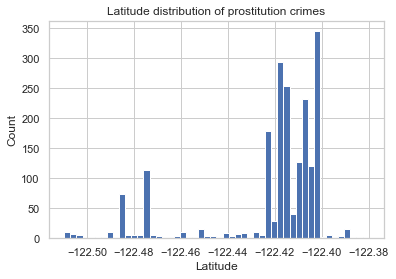

In [99]:
crime='PROSTITUTION'

# Filter the data by category and date
df2=crimedata[(crimedata["Category"] == crime)]
df2=df2[(df2["Date"] > '2014-01-01')
     &(df2["Date"] < '2018-01-01')]

#Plot the count of crimes by latitude coordinates
plt.hist(x=df2['X'], bins=50)
plt.title('Latitude distribution of prostitution crimes')
plt.xlabel('Latitude')
plt.ylabel('Count')

**Comments:** Plotting the latitude of the burglary and prostitution crimes enables us to display how the two crimes are geographically distributed in San Francisco. Altough the main peak in the two crimes is located at a similar latitude, it seems that the prostitution crimes are occurring in very specific areas. Instead, the burglary crimes are much more evenly spread across the territory. This might be due to the fact that prostitution happens in specific areas of the city while burglary is by definition occurring in different houses. It might also be due to the fact that the location of a prostitution crime might be more difficult to identify and thus a standard location might be reported. Conversely, people that file a burglary report also state the house address.

* Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use gaussian_kde from scipy.stats or you can use seaborn.kdeplot.

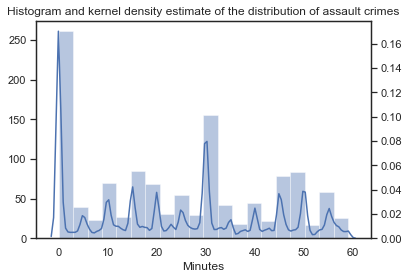

In [100]:
sns.set(style='white')
sns.distplot(df1.Minutes, kde=False, bins=20).set_title('Histogram and kernel density estimate of the distribution of assault crimes')
ax2 = plt.twinx()
sns.kdeplot(df1.Minutes, bw=.5, color="b", ax=ax2, legend=False)

* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading?

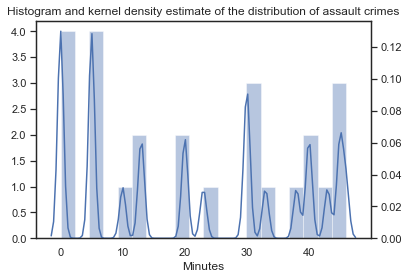

In [101]:
subset_df1=df1.sample(n=25)
sns.distplot(subset_df1.Minutes, kde=False, bins=20).set_title('Histogram and kernel density estimate of the distribution of assault crimes')
ax2 = plt.twinx()
sns.kdeplot(subset_df1.Minutes, bw=.5, color="b", ax=ax2, legend=False)

**Comments:** KDE plots are obtained by placing a kernel at the position of each data point and then adding up the contributions from all kernels. Given that KDE transforms the count of occurrences into a smooth curve and that the area under the curve formed by a single kernel is always 1, the number of observations is not explicitely communicated and might be overlooked. This might lead an observer to mistakenly make inferences about a population based on a graph built with a few observations. Indeed, based on the sample size, two similarly-shaped KDE curves might be more or less prepresentative of the underlying population.
A way to avoid this confusion is to plot, as done above, the histogram and the KDE plot and to display the two scales on two different y axes.

# Part 6: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data.

In the hourly activity for PROSTITUTION something surprising is going on on Thursday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself here.

Exercise: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when we bin the data. We explore this process in the exercise below.

This last exercise for today has two parts.

* In each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

**Answer:**

* Prostitution?

* The crimes being recorded more frequenlty in whole increments of 10/15 minutes is most likely due to an imprecision of the officials recording the time of the crime. This pattern is only visibile if we plot the data at the level of "minute". It causes the distribution to have multiple peaks and the summary statistics to be misleading. However, this does not impact more aggregated statistics, such as statistics at a hour, day, or month level. This imprecision in reporting the time of the crime might have implications when deciding how many people to employ at the police call center. Indeed, if the decision was aimed at reducing the waiting time, the minutes with the highest peak of crimes in an hour would determine the number of people to be employed. Since those peaks are artificial and do not reflect the real distirbution of the crimes, many more people than necessary would be employed in the call center.

* Many sex offences seem to occur at the Hall of Justice at the 800 block of Bryant Street  (https://sfpoa.org/about/contactus). This might be due to the fact that the people reporting sex offence crimes are not asked or are not able to recall the exact location where the crime occurred. The officials working at the Hall of Justice might then report the case by simply including the location of the office itself. This inaccurate data might lead policy analysts to draw wrong conclusions. Firstly, if the data was analysed at an aggregated neighborhood level, the neighborhood where the Hall of Justice is located could be depicted as a very dangerous one. Consequently, on the one hand, excessive investments (lights, police activity, prevention initiatives) might be made to increase the safety of this urban area. On the other hand, the more dangerous areas would not be identified and, therefore, the problem would not be addressed. It might even happen that some investements are transferred from the dangerous areas to neighborhood where the Hall of Justice is located. Secondly, if the data was analysed at a detailed street address level without considering the possibility of errors, one might erroneously conclude that many sex offences occur in the Hall of Justice itself. An inexperienced journalist could claim that many sex offences are perpetrated by the police officers.

* (Optional) Find your own example of human noise in the data and visualize it.

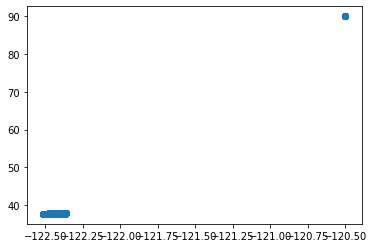

In [8]:
plt.scatter(crimedata['X'], crimedata['Y'])

In [13]:
outliers = crimedata[crimedata['Y'] > 80]
outliers.head(20)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Minutes
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,2004-07-02,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.5 90),4075398065020,43
7,50908404,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,2005-08-13,17:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.5,90.0,POINT (-120.5 90),5090840407021,0
14,50951798,NON-CRIMINAL,LOST PROPERTY,Saturday,2005-08-20,09:30,TENDERLOIN,NONE,5THSTNORTH ST / EDDY ST,-120.5,90.0,POINT (-120.5 90),5095179871000,30
19,51130171,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Thursday,2005-10-06,17:30,RICHMOND,NONE,AVENUE OF THE PALMS / EUCLID AV,-120.5,90.0,POINT (-120.5 90),5113017107041,30
230573,50908404,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Saturday,2005-08-13,17:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.5,90.0,POINT (-120.5 90),5090840407041,0
247532,40975300,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Thursday,2004-08-26,13:35,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.5 90),4097530065016,35
269532,30932887,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Thursday,2003-08-07,15:45,NORTHERN,"ARREST, BOOKED",LARKIN ST / AUSTIN ST,-120.5,90.0,POINT (-120.5 90),3093288762050,45
290072,51104126,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Friday,2005-09-30,23:01,NORTHERN,"ARREST, BOOKED",AUSTIN ST / LARKIN ST,-120.5,90.0,POINT (-120.5 90),5110412662020,1
311800,50978388,OTHER OFFENSES,PROBATION VIOLATION,Tuesday,2005-08-30,20:15,TENDERLOIN,"ARREST, BOOKED",MCALLISTER ST / 7THSTNORTH ST,-120.5,90.0,POINT (-120.5 90),5097838826170,15
319913,40471110,ASSAULT,BATTERY,Saturday,2004-04-24,23:20,BAYVIEW,NONE,JAMES LICK FREEWAY HY / SILVER AV,-120.5,90.0,POINT (-120.5 90),4047111004134,20


In [15]:
len(outliers)

143